### Mapping 256 Pixels to 2048 Subpixels and creating a dict

### 1. Map every pixel to 64 subpixels

- Get center of subpixels using pix2ang
- Then use theta, phi = raDec2thetaPhi(ra, dec) for all subpixels
- pixel_indices = hp.ang2pix(NSIDE, theta,phi)
- Maps the centers of all subpixels to the 256 pixels

In [1]:
import numpy as np
from astropy.io import fits
import healpy as hp
import pandas as pd
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import pickle

In [2]:
def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))


scaling_factor = 8

NSIDE = 256
NPIX = hp.nside2npix(NSIDE)
NSIDE_SUB = NSIDE * scaling_factor
NPIX_SUB = hp.nside2npix(NSIDE_SUB)
print(NSIDE_SUB, NPIX_SUB)

subpixels = np.arange(0, NPIX_SUB)
print(len(subpixels))

2048 50331648
50331648


### Opening an existing pixel2subpixel mapping

In [3]:
# Getting centers of subpixels and mapping subpixels 2 pixels

subpixel_coords = hp.pix2ang(NSIDE_SUB, subpixels)
theta_sub = subpixel_coords[0]
phi_sub = subpixel_coords[1]
pixel_indices = hp.ang2pix(NSIDE, theta_sub, phi_sub)
print(len(pixel_indices))

50331648


In [4]:
# Verifying that pixelation worked accordingly

unique = np.unique(pixel_indices)
print(len(unique))

786432


In [5]:
pixel2subpixel_dict = {}

#Loop through the assigned pixel of every subpixel and fill a dict
for subpixel, pixel in enumerate(pixel_indices):
    if pixel_indices[subpixel] not in pixel2subpixel_dict:
        pixel2subpixel_dict[pixel] = []
    pixel2subpixel_dict[pixel].append(subpixel)

In [7]:
from collections import defaultdict

pixel2subpixel_dict = defaultdict(list)

#Loop through the assigned pixel of every subpixel and fill a dict
for subpixel, pixel in enumerate(pixel_indices):
    pixel2subpixel_dict[pixel].append(subpixel)


In [8]:
# Verify previous step worked by counting list lenght per pixel

#Every Pixel features: This must equal the len of unique pixel NPIX
pixel_count = len(pixel2subpixel_dict.keys())
print(pixel_count)

#Verifying that the 64 subpixels are approximately associated to each pixel
subpixel_count = 0
min = 200
max = 0
for elem in pixel2subpixel_dict.keys():
    elems_in_pixel = len(pixel2subpixel_dict[elem])
    if elems_in_pixel < min:
        min = elems_in_pixel
    if elems_in_pixel > max:
        max = elems_in_pixel
    subpixel_count += elems_in_pixel

print(min)
print(max)
print(subpixel_count)
print(subpixel_count / pixel_count)


786432
64
64
50331648
64.0


In [14]:
# THIS CODE IS NEEDED WHEN A NEW PIXEL2SUBPIXEL DICT WAS CREATED


with open(f'../bricks_data/pixel2subpixel_{NSIDE}_{NSIDE_SUB}.pickle', 'wb') as f:
    pickle.dump(pixel2subpixel_dict, f)
    f.close()


In [ ]:
# Use this cell to simply import an existing pixel2subpixel mapping
pixel2subpixel_dict = {}

with open('../bricks_data/pixel2subpixel_256_2048.pickle', 'rb') as f:
    pixel2subpixel_dict = pickle.load(f)
    f.close()

<ipython-input-15-c9007d2732d4>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pixel_boundary = hp.boundaries(nside=NSIDE_SUB, pix=subpix, step=1)
<ipython-input-15-c9007d2732d4>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depreca

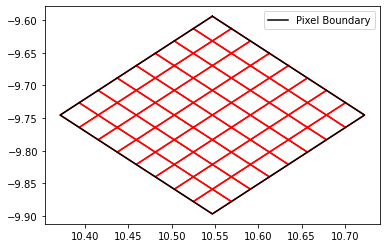

In [15]:
#Plotting Pixel 2 SubPixel Mapping

subpixels = pixel2subpixel_dict[459294]

#Plot Subpixels
for subpix in subpixels:
    pixel_boundary = hp.boundaries(nside=NSIDE_SUB, pix=subpix, step=1)
    pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(), lonlat=True)
    pixel_boundary_raDec = list(pixel_boundary_raDec)
    pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0], pixel_boundary_raDec[0][0])
    pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1], pixel_boundary_raDec[1][0])
    plt.plot(pixel_boundary_raDec[0], pixel_boundary_raDec[1], c='red')

#Plot Larger Pixel
pixel_boundary = hp.boundaries(nside=NSIDE, pix=459294, step=1)
pixel_boundary_raDec = hp.vec2ang(pixel_boundary.transpose(), lonlat=True)
pixel_boundary_raDec = list(pixel_boundary_raDec)
pixel_boundary_raDec[0] = np.append(pixel_boundary_raDec[0], pixel_boundary_raDec[0][0])
pixel_boundary_raDec[1] = np.append(pixel_boundary_raDec[1], pixel_boundary_raDec[1][0])
plt.plot(pixel_boundary_raDec[0], pixel_boundary_raDec[1], c='black', label="Pixel Boundary")

plt.legend()
plt.show()
